In [ ]:
from google.colab import drive
drive.mount('/data/')
data_dir = '/data/My Drive/Colab Notebooks/Experiment'
!ls '/data/My Drive/Colab Notebooks/Experiment'
!pip install matplotlib

Mounted at /data/
diamonds.csv  Iris.csv	m_data.csv  w_data.csv


In [ ]:
import pandas as pd

df = pd.read_csv(data_dir+'/diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import svm  
from sklearn import metrics 
from sklearn.tree import DecisionTreeClassifier

df['color_int'] = df['color'].astype('category').cat.codes

transform = {'Ideal':0, 'Premium':1, 'Good':2, 'Very Good':3, 'Fair':4}
df['cut_int']=df['cut'].apply(lambda x: transform[x])

transform_clarity ={'SI2':6, 'SI1':5, 'VS1':3, 'VS2':4, 'VVS2':2, 'VVS1':1, 'I1':7, 'IF':0}
df['clarity_int']=df['clarity'].apply(lambda x: transform_clarity[x])

In [ ]:
df.head(2)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z,color_int,cut_int,clarity_int
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1,0,6
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1,1,5


In [ ]:
features = ['carat','color_int','cut_int','clarity_int','x','y','z','depth','table']
X = df[features]
y = df['price']

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

Decision Tree Model 

In [ ]:
tree = DecisionTreeRegressor(random_state=1)
tree.fit(train_X, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [ ]:
prediction = tree.predict(test_X)
test_mse = mean_absolute_error(prediction, test_y)

errors = prediction - test_y
test_mse

351.4046718576196

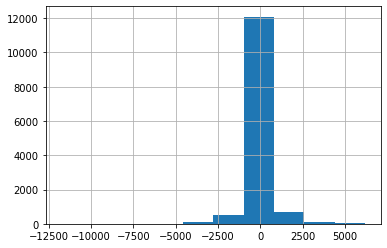

In [ ]:
errors.hist()

Random Forest Model

In [ ]:
rf = RandomForestRegressor(random_state=1)
rf.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
prediction = rf.predict(test_X)
test_mse_rf = mean_absolute_error(prediction, test_y)

errors = prediction - test_y
test_mse_rf

269.7082693527788

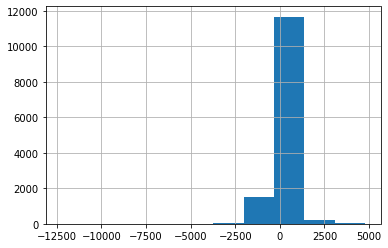

In [ ]:
errors.hist()

In [ ]:
init_features = ['carat','color_int','cut_int','clarity_int','x','y','z','depth','table']
from random import random, randint, choice

def diff(li1, li2):
    return (list(list(set(li1)-set(li2)) + list(set(li2)-set(li1))))

def step(features):

    if random()<0.5: 
      indx = randint(0,len(features)-1)
      print("removing",features[indx])
      features.remove(features[indx])
      return(features)
    else:
      d = diff(features,init_features)
      if not d:
        print("do nothing")
        return(features)
      else:
        f = choice(d)
        print("adding",f)
        features.append(f)
        return(features)

def evaluate(features):

    X = df[features]
    y = df['price']
    train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1)
    rf.fit(train_X,train_y)
    predictions = rf.predict(test_X)
    val_mae = mean_absolute_error(predictions, test_y)
    return(val_mae)

def optmize():

    print("###")
    start_features = ['carat','color_int','cut_int','clarity_int','x','y','z','depth','table']
    ff=start_features
    old_mae = 10000000

    for i in range(10):
      new_features = step(ff)
      mae = evaluate(new_features)
      print(i,mae,features)
      if mae < old_mae:
        ff = new_features
        old_mae = mae
        print("accepting result")
      else:
        print("rejecting result")



In [ ]:
optmize()

###
removing y
0 272.65941055964595 ['carat', 'color_int', 'cut_int', 'clarity_int', 'x', 'y', 'z', 'depth', 'table']
accepting result
removing z
1 275.2602746508466 ['carat', 'color_int', 'cut_int', 'clarity_int', 'x', 'y', 'z', 'depth', 'table']
rejecting result
adding z
2 272.6264143169071 ['carat', 'color_int', 'cut_int', 'clarity_int', 'x', 'y', 'z', 'depth', 'table']
accepting result
adding y
3 264.38214012924414 ['carat', 'color_int', 'cut_int', 'clarity_int', 'x', 'y', 'z', 'depth', 'table']
accepting result
removing y
4 272.6264143169071 ['carat', 'color_int', 'cut_int', 'clarity_int', 'x', 'y', 'z', 'depth', 'table']
rejecting result
removing carat
5 289.8830542295673 ['carat', 'color_int', 'cut_int', 'clarity_int', 'x', 'y', 'z', 'depth', 'table']
rejecting result
removing z
6 306.39629205907795 ['carat', 'color_int', 'cut_int', 'clarity_int', 'x', 'y', 'z', 'depth', 'table']
rejecting result
adding z
7 289.8830542295673 ['carat', 'color_int', 'cut_int', 'clarity_int', 'x', 